In [1]:
import pandas as pd

In [2]:
#Import the data for the mpox user-reported symptoms
df = pd.read_csv('C:\\Users\\Ayomide Joe\\Documents\\Datasets\\mpox\\mpx_surveys.csv')
df.head()

,SURVEY_STATIC_ID,REGISTRANT_CODE,RESPONSE_ID,STARTED_ON,STARTED_ON_TIME,DAYS_SINCE,DISCOLORATION,FEELING_TODAY,FEVER,FEVER_TEMP,...,SYSTEMIC_REACTION_NAUSEA,SYSTEMIC_REACTION_OTHER,SYSTEMIC_REACTION_RASH,SYSTEMIC_REACTION_SLEEPINESS,SYSTEMIC_REACTION_VOMITING,SYSTEMIC_REACTION_ABDOMINAL_PAIN,TESTED_POSITIVE,TESTED_POSITIVE_DATE,DURATION_MINS,PREFERRED_LANGUAGE
0,mpox-dose1-day-0,M4P-27122-78757,s315853484193099679904600423595718145619,11/16/2022,6:45:16 PM,0,NaN,Good,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.13,English
1,mpox-dose2-day-7,62G-11972-57766,s315854424788894109318980158806983105068,11/17/2022,11:47:17 AM,8,NaN,Fair,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.70,English
2,mpox-dose2-day-14,GND-28154-84422,s315853352631665629884692860503174340471,11/17/2022,11:57:11 AM,15,NaN,Good,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.60,English
3,mpox-dose2-day-14,ABC-17238-66958,s315853352631674092365430162907397283703,11/17/2022,11:05:26 AM,17,NaN,Good,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.33,English
4,mpox-dose2-day-42,RL3-84447-22806,s315853359794399995761300517538329458126,11/17/2022,11:28:31 AM,43,No,Good,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,0.57,English


In [3]:
#drop selected columns that are not directly relevant to the analysis
df.drop(columns=['TESTED_POSITIVE', 'TESTED_POSITIVE_DATE', 'DURATION_MINS', 'PREFERRED_LANGUAGE', 'RESPONSE_ID', 'STARTED_ON_TIME'], inplace=True)


In [4]:
df.shape

(1295, 40)

In [5]:
#Import the demographics data
df2 = pd.read_csv('C:\\Users\\Ayomide Joe\\Documents\\Datasets\\mpox\\mpx_registrants.csv')
df2.head()

,REGISTRANT_CODE,SEX,GENDER,RACE,ETHNICITY,REGISTERED_DATE,RELATIONSHIP,GUARDIAN_REGISTRANT_CODE,dob_year
0,26F-16208-93714,Male,Male,White,Hispanic or Latino,03/13/2023,NaN,NaN,1970
1,2CV-85903-38005,Female,Unknown,White,Not Hispanic or Latino,02/07/2023,NaN,NaN,1987
2,2F7-13662-01472,Male,Male,White,Not Hispanic or Latino,12/05/2022,NaN,NaN,1984
3,2MT-23746-72084,Unknown,Transgender,Asian:White,Unknown,12/29/2022,NaN,NaN,2000
4,2T4-24470-34734,Female,Female,White,Hispanic or Latino,11/18/2022,NaN,NaN,1982


In [59]:
#drop selected columns
df22 = df2.drop(columns=['REGISTERED_DATE', 'RELATIONSHIP', 'GUARDIAN_REGISTRANT_CODE'])

In [7]:
#Merge the two dataframes
merged_df = pd.merge(df, df22, on='REGISTRANT_CODE', how='left')
merged_df.shape

(1295, 45)

In [41]:
merged_df.head(10)

,SURVEY_STATIC_ID,REGISTRANT_CODE,STARTED_ON,DAYS_SINCE,DISCOLORATION,FEELING_TODAY,FEVER,FEVER_TEMP,FEVER_KNOWN,HAD_SYMPTOMS,...,SYSTEMIC_REACTION_OTHER,SYSTEMIC_REACTION_RASH,SYSTEMIC_REACTION_SLEEPINESS,SYSTEMIC_REACTION_VOMITING,SYSTEMIC_REACTION_ABDOMINAL_PAIN,SEX,GENDER,RACE,ETHNICITY,dob_year
0,mpox-dose1-day-0,M4P-27122-78757,11/16/2022,0,No,Good,No,No,No,No,...,No,No,No,No,No,Male,Male,White,Not Hispanic or Latino,1984
1,mpox-dose2-day-7,62G-11972-57766,11/17/2022,8,No,Fair,No,No,No,No,...,No,No,No,No,No,Female,Female,White,Not Hispanic or Latino,1993
2,mpox-dose2-day-14,GND-28154-84422,11/17/2022,15,No,Good,No,No,No,No,...,No,No,No,No,No,Male,Male,White,Not Hispanic or Latino,1964
3,mpox-dose2-day-14,ABC-17238-66958,11/17/2022,17,No,Good,No,No,No,No,...,No,No,No,No,No,Male,Male,White,Not Hispanic or Latino,1997
4,mpox-dose2-day-42,RL3-84447-22806,11/17/2022,43,No,Good,No,No,No,No,...,No,No,No,No,No,Male,Male,Other,Hispanic or Latino,1986
5,mpox-dose2-day-28,S7J-20249-62304,11/17/2022,29,No,Good,No,No,No,No,...,No,No,No,No,No,Female,Female,Black or African American,Not Hispanic or Latino,1963
6,mpox-dose1-day-28,VAX-26350-82875,11/17/2022,29,No,Good,No,No,No,No,...,No,No,No,No,No,Male,Male,Asian,Not Hispanic or Latino,1971
7,mpox-dose2-day-35,S9G-52668-96924,11/17/2022,36,No,Good,No,No,No,No,...,No,No,No,No,No,Male,Male,White,Not Hispanic or Latino,1948
8,mpox-dose2-day-35,8V9-10811-68404,11/17/2022,37,No,Good,No,No,No,No,...,No,No,No,No,No,Female,Female,White,Not Hispanic or Latino,1993
9,mpox-dose2-day-42,DAA-91906-80826,11/17/2022,48,Yes,Good,No,No,No,No,...,No,No,No,No,No,Male,Male,White,Hispanic or Latino,1980


In [9]:
# Replace all NaN values in the DataFrame with the string "No"
merged_df = merged_df.fillna("No")

#check a sample of the DataFrame to confirm the changes
print(merged_df.head())

    SURVEY_STATIC_ID  REGISTRANT_CODE  STARTED_ON  DAYS_SINCE DISCOLORATION  \
0   mpox-dose1-day-0  M4P-27122-78757  11/16/2022           0            No   
1   mpox-dose2-day-7  62G-11972-57766  11/17/2022           8            No   
2  mpox-dose2-day-14  GND-28154-84422  11/17/2022          15            No   
3  mpox-dose2-day-14  ABC-17238-66958  11/17/2022          17            No   
4  mpox-dose2-day-42  RL3-84447-22806  11/17/2022          43            No   

  FEELING_TODAY FEVER FEVER_TEMP FEVER_KNOWN HAD_SYMPTOMS  ...  \
0          Good    No         No          No           No  ...   
1          Fair    No         No          No           No  ...   
2          Good    No         No          No           No  ...   
3          Good    No         No          No           No  ...   
4          Good    No         No          No           No  ...   

  SYSTEMIC_REACTION_OTHER SYSTEMIC_REACTION_RASH SYSTEMIC_REACTION_SLEEPINESS  \
0                      No                     N

In [10]:
#drop some columns
columns_to_drop = [
    'FEVER_TEMP', 'HEALTHCARE_VISITS', 'POS_PREG_TEST_AFTER_DOSE1', 'GENDER',
    'PREGNANCY_TEST', 'SITE_REACTION_ITCHING', 'SITE_REACTION_LUMP', 
    'SITE_REACTION_PAIN', 'SITE_REACTION_RASH', 'SITE_REACTION_REDNESS', 
    'SITE_REACTION_SWELLING', 'SITE_REACTION_UNDERARM_SWELLING', 'SYSTEMIC_REACTION', 'SITE_REACTION'
]

# Drop the columns from the DataFrame
merged_df2 = merged_df.drop(columns=columns_to_drop)


In [11]:
#view the unique variables in each of the columns
for column in merged_df2.columns:
    unique_values = merged_df2[column].unique()
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}")
    print("-" * 50)

Column: SURVEY_STATIC_ID
Unique Values: ['mpox-dose1-day-0' 'mpox-dose2-day-7' 'mpox-dose2-day-14'
 'mpox-dose2-day-42' 'mpox-dose2-day-28' 'mpox-dose1-day-28'
 'mpox-dose2-day-35' 'mpox-dose1-day-1' 'mpox-dose2-day-3'
 'mpox-dose2-day-49-plus' 'mpox-dose1-day-49-plus' 'mpox-dose2-day-21'
 'mpox-dose2-day-0' 'mpox-dose2-day-4' 'mpox-dose1-day-2'
 'mpox-dose1-day-42' 'mpox-dose1-day-3' 'mpox-dose2-day-1'
 'mpox-dose2-day-2' 'mpox-dose2-day-5' 'mpox-dose1-day-4'
 'mpox-dose2-day-6' 'mpox-dose1-day-7' 'mpox-dose1-day-5'
 'mpox-dose1-day-6' 'mpox-dose1-day-21' 'mpox-dose1-day-14'
 'mpox-dose1-day-35']
--------------------------------------------------
Column: REGISTRANT_CODE
Unique Values: ['M4P-27122-78757' '62G-11972-57766' 'GND-28154-84422' 'ABC-17238-66958'
 'RL3-84447-22806' 'S7J-20249-62304' 'VAX-26350-82875' 'S9G-52668-96924'
 '8V9-10811-68404' 'DAA-91906-80826' 'M7T-30500-88365' 'CB4-31011-63913'
 '44Q-31558-71952' '5FN-28422-64754' 'G8M-89156-58284' 'DC5-25954-61685'
 '5RL-22991-9

In [15]:
#reduce granularity of the race column
# Define the mapping dictionary
race_mapping = {
    'White:Other': 'White',
    'Black or African American:White': 'Black or African American',
    'Asian:White': 'Asian',
    'Asian:Other:White': 'Asian',
    'American Indian or Alaska Native:Asian': 'American Indian or Alaska Native',
    'American Indian or Alaska Native:Other:White': 'American Indian or Alaska Native',
    'American Indian or Alaska Native:Other': 'American Indian or Alaska Native',
    'American Indian or Alaska Native:White': 'American Indian or Alaska Native'
}

# Apply the mapping to the 'RACE' column
merged_df2['RACE'] = merged_df2['RACE'].replace(race_mapping)

# Optionally, check the updated DataFrame to see the changes
print(merged_df2['RACE'].value_counts())


RACE
White                               905
Black or African American           133
Asian                               133
Other                                75
American Indian or Alaska Native     38
Unknown                              11
Name: count, dtype: int64


In [17]:
# Sort the DataFrame by 'REGISTRANT_CODE' and 'STARTED_ON'
merged_df2 = merged_df2.sort_values(by=['REGISTRANT_CODE', 'STARTED_ON'])

# Group the sorted DataFrame by 'REGISTRANT_CODE'
grouped = merged_df2.groupby('REGISTRANT_CODE')

In [18]:
#Encode yes,no, mild, moderate and severe
def encode_symptoms(df):
    for col in df.columns:
        # Convert object dtype columns to string to ensure consistency
        if df[col].dtype == 'object':
            df[col] = df[col].astype(str).str.strip().str.lower()

        # Re-map 'yes'/'no' after cleaning
        if df[col].dtype == 'object' and set(df[col].unique()).intersection({'yes', 'no'}):
            df[col] = df[col].map({'yes': 1, 'no': 0})
            print(f"Re-mapping 'yes'/'no' to 1/0 in column: {col}")

        # Ordinal Encoding for ordered categories
        elif set(df[col].unique()).issubset({'no', 'mild', 'moderate', 'severe'}):
            ordinal_map = {'no': 0, 'mild': 1, 'moderate': 2, 'severe': 3}
            df[col] = df[col].map(ordinal_map)
            print(f"Ordinal encoding applied to column: {col}")

       
    return df

# Apply the encoding function to each group
encoded_groups = []
for patient_id, group in grouped:
    encoded_group = encode_symptoms(group)
    encoded_groups.append(encoded_group)

# Combine the groups back into a single DataFrame
encoded_df = pd.concat(encoded_groups)

# Verify the encoding
print(encoded_df['FEVER'].unique())

Re-mapping 'yes'/'no' to 1/0 in column: DISCOLORATION
Re-mapping 'yes'/'no' to 1/0 in column: FEVER
Re-mapping 'yes'/'no' to 1/0 in column: FEVER_KNOWN
Re-mapping 'yes'/'no' to 1/0 in column: HAD_SYMPTOMS
Re-mapping 'yes'/'no' to 1/0 in column: KELOID
Re-mapping 'yes'/'no' to 1/0 in column: MYOCARDITIS
Re-mapping 'yes'/'no' to 1/0 in column: SEEK_CARE
Re-mapping 'yes'/'no' to 1/0 in column: SYSTEMIC_REACTION_CHILLS
Re-mapping 'yes'/'no' to 1/0 in column: SYSTEMIC_REACTION_DIARRHEA
Re-mapping 'yes'/'no' to 1/0 in column: SYSTEMIC_REACTION_FATIGUE
Re-mapping 'yes'/'no' to 1/0 in column: SYSTEMIC_REACTION_HEADACHE
Re-mapping 'yes'/'no' to 1/0 in column: SYSTEMIC_REACTION_IRRITABILITY
Re-mapping 'yes'/'no' to 1/0 in column: SYSTEMIC_REACTION_JOINT_PAIN
Re-mapping 'yes'/'no' to 1/0 in column: SYSTEMIC_REACTION_LOSS_APPETITE
Re-mapping 'yes'/'no' to 1/0 in column: SYSTEMIC_REACTION_MUSCLE_ACHES
Re-mapping 'yes'/'no' to 1/0 in column: SYSTEMIC_REACTION_NAUSEA
Re-mapping 'yes'/'no' to 1/0 in c

In [46]:
encoded_df.head()

,SURVEY_STATIC_ID,REGISTRANT_CODE,STARTED_ON,DAYS_SINCE,DISCOLORATION,FEELING_TODAY,FEVER,FEVER_KNOWN,HAD_SYMPTOMS,HEALTH_IMPACT,...,SYSTEMIC_REACTION_OTHER,SYSTEMIC_REACTION_RASH,SYSTEMIC_REACTION_SLEEPINESS,SYSTEMIC_REACTION_VOMITING,SYSTEMIC_REACTION_ABDOMINAL_PAIN,SEX,RACE,ETHNICITY,age,WEEK
1236,mpox-dose2-day-49-plus,26f-16208-93714,2023-03-14,196,0.0,good,0,0,0,be unable to do your normal daily activities,...,0.0,0.0,0,0.0,0.0,male,white,hispanic or latino,54,28
639,mpox-dose1-day-28,2f7-13662-01472,2023-01-02,30,0.0,good,0,0,0,be unable to do your normal daily activities,...,0.0,0.0,0,0.0,0.0,male,white,not hispanic or latino,40,4
684,mpox-dose2-day-0,2f7-13662-01472,2023-01-06,0,0.0,good,0,0,0,be unable to do your normal daily activities,...,0.0,0.0,0,0.0,0.0,male,white,not hispanic or latino,40,0
696,mpox-dose2-day-1,2f7-13662-01472,2023-01-07,1,0.0,good,0,0,0,be unable to do your normal daily activities,...,0.0,0.0,0,0.0,0.0,male,white,not hispanic or latino,40,0
701,mpox-dose2-day-2,2f7-13662-01472,2023-01-08,2,0.0,good,0,0,0,be unable to do your normal daily activities,...,0.0,0.0,0,0.0,0.0,male,white,not hispanic or latino,40,0


In [49]:
#There is a need to separate the dataframe to analyze the reports per dose
# Create a new DataFrame by selecting rows where the value starts with 'mpox-dose1'
dose1_df = encoded_df[encoded_df['SURVEY_STATIC_ID'].str.startswith("mpox-dose1", na=False)]

# Optionally, check the new DataFrame to see the selected rows
dose1_df.head()

,SURVEY_STATIC_ID,REGISTRANT_CODE,STARTED_ON,DAYS_SINCE,DISCOLORATION,FEELING_TODAY,FEVER,FEVER_KNOWN,HAD_SYMPTOMS,HEALTH_IMPACT,...,SYSTEMIC_REACTION_OTHER,SYSTEMIC_REACTION_RASH,SYSTEMIC_REACTION_SLEEPINESS,SYSTEMIC_REACTION_VOMITING,SYSTEMIC_REACTION_ABDOMINAL_PAIN,SEX,RACE,ETHNICITY,age,WEEK
639,mpox-dose1-day-28,2f7-13662-01472,2023-01-02,30,0.0,good,0,0,0,be unable to do your normal daily activities,...,0.0,0.0,0,0.0,0.0,male,white,not hispanic or latino,40,4
247,mpox-dose1-day-2,2f7-13662-01472,2022-12-05,2,0.0,good,0,0,0,be unable to do your normal daily activities,...,0.0,0.0,0,0.0,0.0,male,white,not hispanic or latino,40,0
259,mpox-dose1-day-3,2f7-13662-01472,2022-12-06,3,0.0,good,0,0,0,be unable to do your normal daily activities,...,0.0,0.0,0,0.0,0.0,male,white,not hispanic or latino,40,0
271,mpox-dose1-day-4,2f7-13662-01472,2022-12-07,4,0.0,good,0,0,0,be unable to do your normal daily activities,...,0.0,0.0,0,0.0,0.0,male,white,not hispanic or latino,40,0
287,mpox-dose1-day-5,2f7-13662-01472,2022-12-08,5,0.0,good,0,0,0,be unable to do your normal daily activities,...,0.0,0.0,0,0.0,0.0,male,white,not hispanic or latino,40,0


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
# List of symptom columns
symptom_columns = ['FEVER','SYSTEMIC_REACTION_CHILLS', 'SYSTEMIC_REACTION_FATIGUE', 
                   'SYSTEMIC_REACTION_IRRITABILITY', 'SYSTEMIC_REACTION_JOINT_PAIN', 'SYSTEMIC_REACTION_MUSCLE_ACHES', 'SYSTEMIC_REACTION_HEADACHE' ] 

# Count the number of positive responses for each symptom
symptom_counts = dose1_df[symptom_columns].apply(lambda x: (x > 0).sum()).sort_values(ascending=False)

# Display the counts
print("count of selected symptoms:")
print(symptom_counts)

Top Occurring Side Effects:
SYSTEMIC_REACTION_FATIGUE         9
FEVER                             8
SYSTEMIC_REACTION_JOINT_PAIN      2
SYSTEMIC_REACTION_MUSCLE_ACHES    2
SYSTEMIC_REACTION_CHILLS          1
SYSTEMIC_REACTION_HEADACHE        1
SYSTEMIC_REACTION_IRRITABILITY    0
dtype: int64


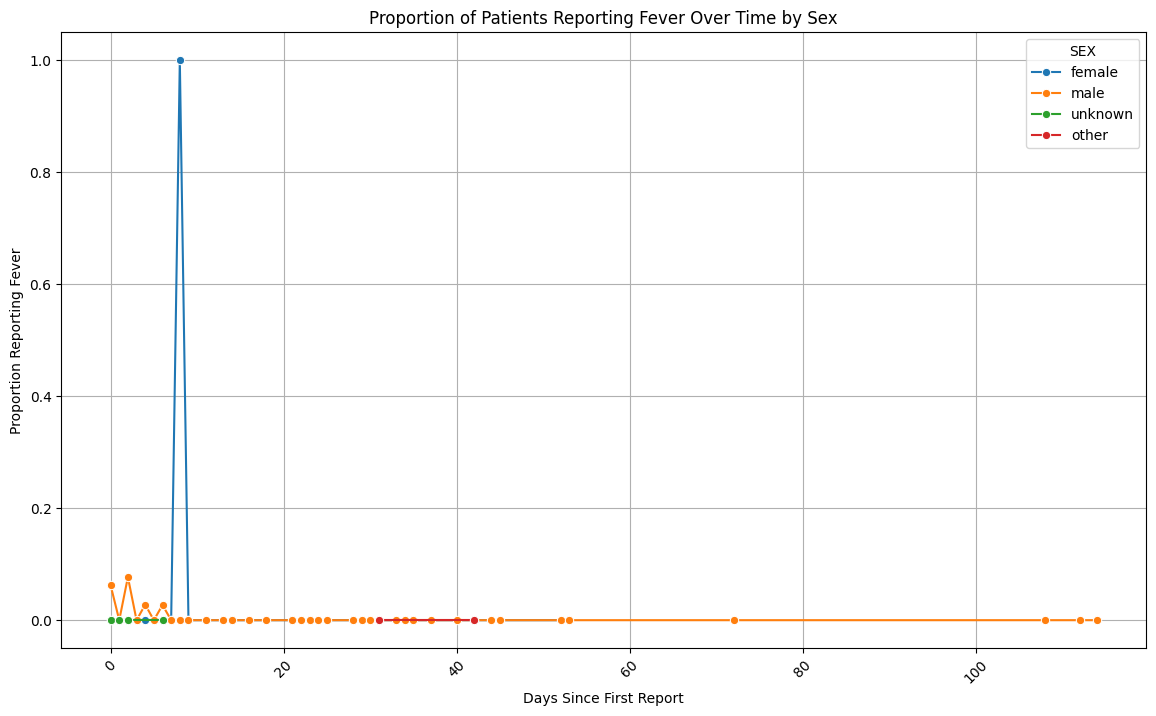

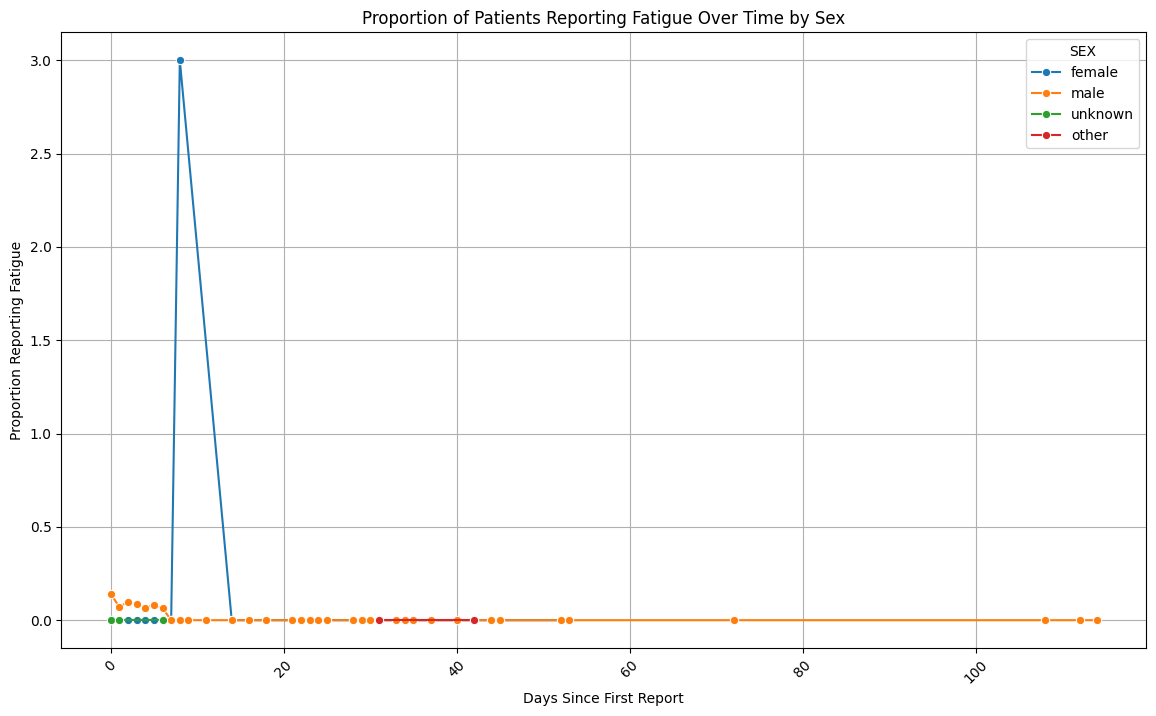

In [53]:
# Calculate the proportion of patients reporting 'FEVER' and 'SYSTEMIC_REACTION_FATIGUE' over time, grouped by 'SEX' and 'DAYS_SINCE'
fever_fatigue_time_series = dose1_df.groupby(['DAYS_SINCE', 'SEX'])[['FEVER', 'SYSTEMIC_REACTION_FATIGUE']].mean().reset_index()

# Plotting 'FEVER' time series
plt.figure(figsize=(14, 8))
sns.lineplot(data=fever_fatigue_time_series, x='DAYS_SINCE', y='FEVER', hue='SEX', marker='o')
plt.title('Proportion of Patients Reporting Fever Over Time by Sex')
plt.xlabel('Days Since First Report')
plt.ylabel('Proportion Reporting Fever')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plotting 'SYSTEMIC_REACTION_FATIGUE' time series
plt.figure(figsize=(14, 8))
sns.lineplot(data=fever_fatigue_time_series, x='DAYS_SINCE', y='SYSTEMIC_REACTION_FATIGUE', hue='SEX', marker='o')
plt.title('Proportion of Patients Reporting Fatigue Over Time by Sex')
plt.xlabel('Days Since First Report')
plt.ylabel('Proportion Reporting Fatigue')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [56]:
#There is a need to separate the dataframe to analyze the reports per dose
# Create a new DataFrame by selecting rows where the value starts with 'mpox-dose2'
dose2_df = encoded_df[encoded_df['SURVEY_STATIC_ID'].str.startswith("mpox-dose2", na=False)]

# check the new DataFrame to see the selected rows
dose2_df.head()

,SURVEY_STATIC_ID,REGISTRANT_CODE,STARTED_ON,DAYS_SINCE,DISCOLORATION,FEELING_TODAY,FEVER,FEVER_KNOWN,HAD_SYMPTOMS,HEALTH_IMPACT,...,SYSTEMIC_REACTION_OTHER,SYSTEMIC_REACTION_RASH,SYSTEMIC_REACTION_SLEEPINESS,SYSTEMIC_REACTION_VOMITING,SYSTEMIC_REACTION_ABDOMINAL_PAIN,SEX,RACE,ETHNICITY,age,WEEK
1236,mpox-dose2-day-49-plus,26f-16208-93714,2023-03-14,196,0.0,good,0,0,0,be unable to do your normal daily activities,...,0.0,0.0,0,0.0,0.0,male,white,hispanic or latino,54,28
684,mpox-dose2-day-0,2f7-13662-01472,2023-01-06,0,0.0,good,0,0,0,be unable to do your normal daily activities,...,0.0,0.0,0,0.0,0.0,male,white,not hispanic or latino,40,0
696,mpox-dose2-day-1,2f7-13662-01472,2023-01-07,1,0.0,good,0,0,0,be unable to do your normal daily activities,...,0.0,0.0,0,0.0,0.0,male,white,not hispanic or latino,40,0
701,mpox-dose2-day-2,2f7-13662-01472,2023-01-08,2,0.0,good,0,0,0,be unable to do your normal daily activities,...,0.0,0.0,0,0.0,0.0,male,white,not hispanic or latino,40,0
709,mpox-dose2-day-3,2f7-13662-01472,2023-01-09,3,0.0,good,0,0,0,be unable to do your normal daily activities,...,0.0,0.0,0,0.0,0.0,male,white,not hispanic or latino,40,0


In [57]:
# List of symptom columns
symptom_columns = ['FEVER','SYSTEMIC_REACTION_CHILLS', 'SYSTEMIC_REACTION_FATIGUE', 
                   'SYSTEMIC_REACTION_IRRITABILITY', 'SYSTEMIC_REACTION_JOINT_PAIN', 'SYSTEMIC_REACTION_MUSCLE_ACHES', 'SYSTEMIC_REACTION_HEADACHE' ] 

# Count the number of positive responses for each symptom
symptom_counts = dose2_df[symptom_columns].apply(lambda x: (x > 0).sum()).sort_values(ascending=False)

# Display the counts
print("count of selected symptoms:")
print(symptom_counts)

count of selected symptoms:
FEVER                             8
SYSTEMIC_REACTION_FATIGUE         2
SYSTEMIC_REACTION_JOINT_PAIN      2
SYSTEMIC_REACTION_HEADACHE        2
SYSTEMIC_REACTION_MUSCLE_ACHES    2
SYSTEMIC_REACTION_CHILLS          0
SYSTEMIC_REACTION_IRRITABILITY    0
dtype: int64


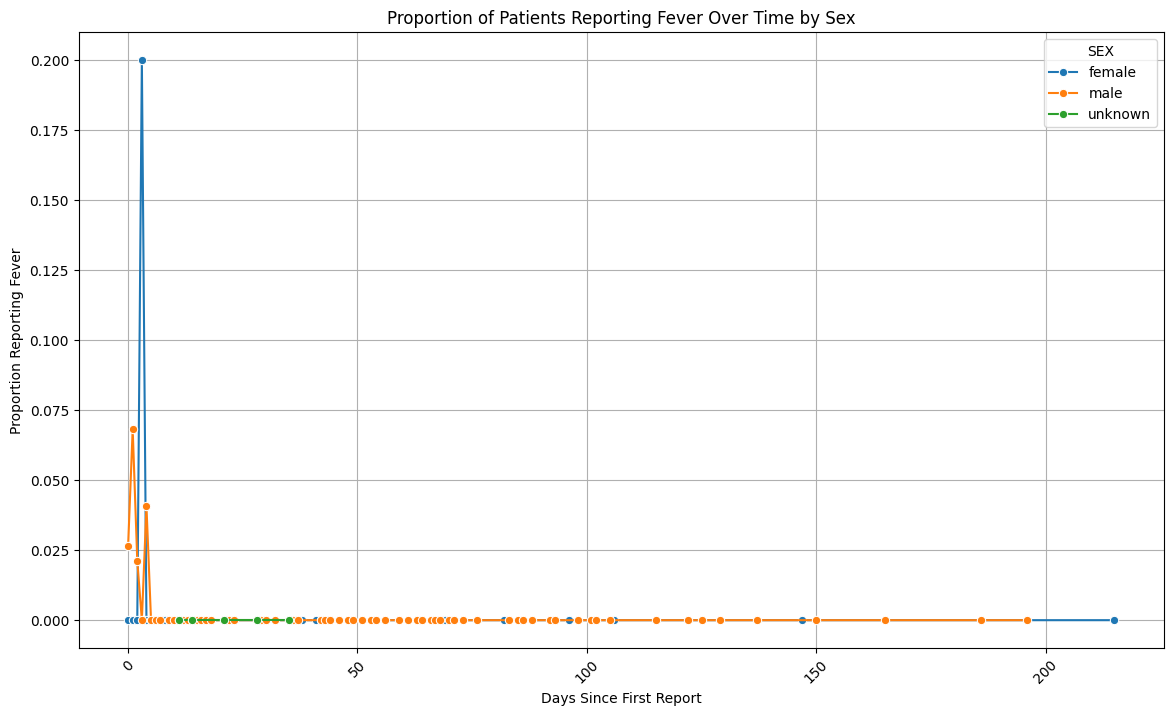

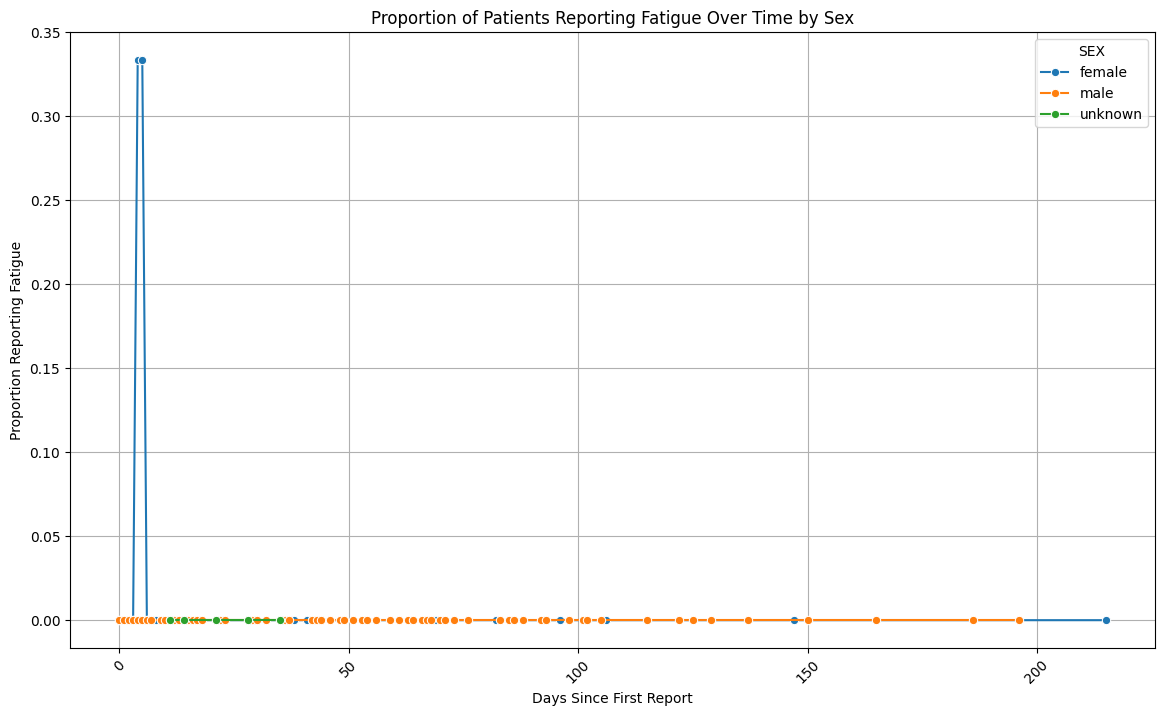

In [58]:
# Calculate the proportion of patients reporting 'FEVER' and 'SYSTEMIC_REACTION_FATIGUE' over time, grouped by 'SEX' and 'DAYS_SINCE'
fever_fatigue_time_series = dose2_df.groupby(['DAYS_SINCE', 'SEX'])[['FEVER', 'SYSTEMIC_REACTION_FATIGUE']].mean().reset_index()

# Plotting 'FEVER' time series
plt.figure(figsize=(14, 8))
sns.lineplot(data=fever_fatigue_time_series, x='DAYS_SINCE', y='FEVER', hue='SEX', marker='o')
plt.title('Proportion of Patients Reporting Fever Over Time by Sex')
plt.xlabel('Days Since First Report')
plt.ylabel('Proportion Reporting Fever')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plotting 'SYSTEMIC_REACTION_FATIGUE' time series
plt.figure(figsize=(14, 8))
sns.lineplot(data=fever_fatigue_time_series, x='DAYS_SINCE', y='SYSTEMIC_REACTION_FATIGUE', hue='SEX', marker='o')
plt.title('Proportion of Patients Reporting Fatigue Over Time by Sex')
plt.xlabel('Days Since First Report')
plt.ylabel('Proportion Reporting Fatigue')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
